# Airbnb Business Analysis of New York and Austin 2019

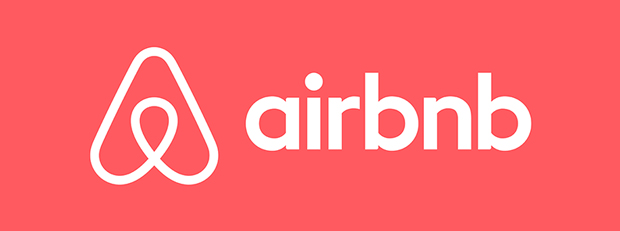

In [1]:
from IPython.display import display, Image

path = "airbnb_logo.jpg"
img = Image(path)
display(img)

## 1. Business Understanding

### > Business Problem/Use Case: 1. To extract insights from Airbnb listings in New York and Austin and segregate them as location, host and cost attributes. 2. To predict the price of Airbnb listings in New York using the listing information/attributes provided so as to create a price optimization model which helps Airbnb hosts set the right price for their Airbnb listing and also provides the customers, the benefit of cost.

### > Type of Problem: Regression Analysis (Supervised Machine Learning Problem) and Data Visualization

### > Dependent Variable: price (Price of Airbnb listing per night in US dollar)

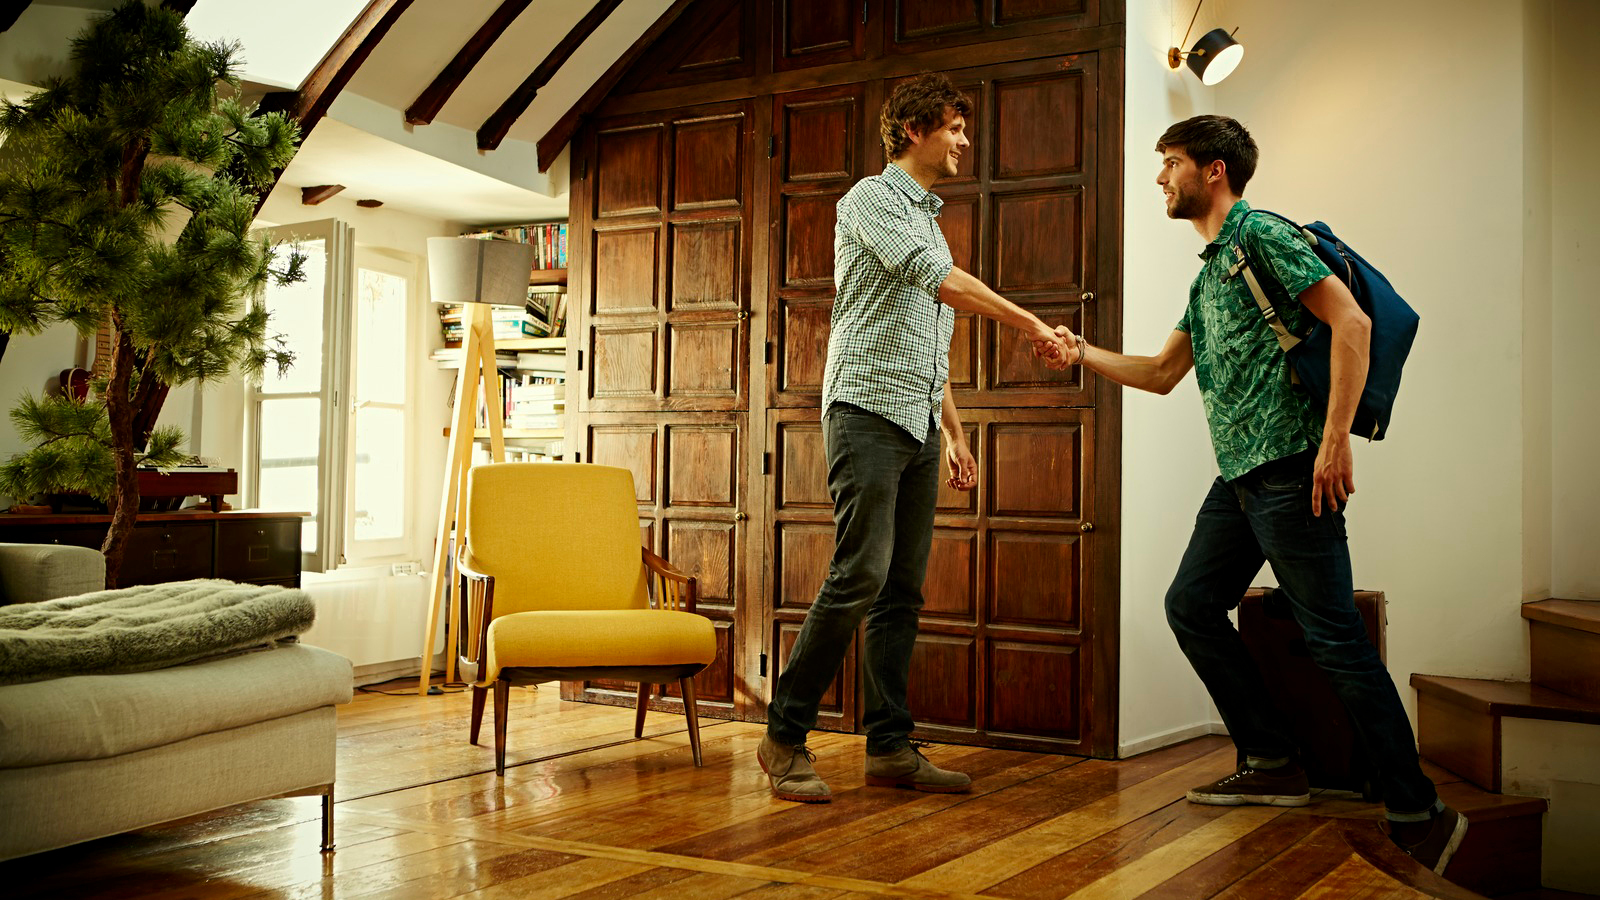

In [2]:
path1 = "hosts.jpg"
img1 = Image(path1)
display(img1)

## 2. Data Acquisition and Understanding

### > Dataset : Raw Scraped Airbnb detailed listings of New York 2019 (.csv file) - 50,598 unique listings and 106 columns/attributes

### Note : We dropped certain columns/attributes that were not required for analysis or viz through Excel before loading the data.

## 2.1 Raw to Relevant Data

### > Data Sources and Dataset description is necessary

### > Import python libraries for data analysis, load and display data and other characteristics of dataframe

### > Understand the columns/attributes through column description and extensive research

### > Drop columns/attributes not at all required or useful for analysis or viz, rename certain columns and transform/add certain columns that could be required or useful for analysis or viz.

In [3]:
# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Importing python libraries for data analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import researchpy as rp

pd.set_option('display.max_rows', 250)
pd.set_option('display.max_columns', 250)

# Reading csv file and making dataframe
airbnb_df = pd.read_csv('Airbnb detailed listings for NYC 2019 - Transformed.csv')
airbnb_df.head(10)

,listing_id,scrape_date,listing_name,host_id,host_name,host_since,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_verifications,host_identity_verified,neighbourhood,neighbourhood_group,city,state,zipcode,country,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,07-12-2019,Skylit Midtown Castle,2845,Jennifer,09-09-2008,within a day,85%,f,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,Midtown,Manhattan,New York,NY,10018,United States,40.75362,-73.98377,Apartment,Entire home/apt,1,1.0,0.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",$225.00,1,48,7,21-11-2009,04-11-2019,94.0,9.0,9.0,10.0,10.0,10.0,9.0,f,strict_14_with_grace_period,1,1,0,0,0.39
1,3831,07-12-2019,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,07-12-2008,within an hour,100%,f,1.0,"['email', 'phone', 'reviews', 'kba']",t,Clinton Hill,Brooklyn,Brooklyn,NY,11238,United States,40.68514,-73.95976,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$89.00,1,295,75,30-09-2014,22-11-2019,90.0,9.0,9.0,10.0,9.0,10.0,9.0,f,moderate,1,1,0,0,4.67
2,5099,06-12-2019,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,02-02-2009,NaN,NaN,f,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",f,Murray Hill,Manhattan,New York,NY,10016,United States,40.74767,-73.97500,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",$200.00,2,78,8,20-04-2009,13-10-2019,90.0,10.0,9.0,10.0,10.0,10.0,9.0,f,moderate,1,1,0,0,0.60
3,5121,06-12-2019,BlissArtsSpace!,7356,Garon,03-02-2009,within a few hours,100%,f,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",f,Bedford-Stuyvesant,Brooklyn,Brooklyn,NY,11216,United States,40.68688,-73.95596,Apartment,Private room,2,NaN,1.0,1.0,Futon,"{Wifi,""Air conditioning"",Kitchen,""Pets live on...",$60.00,1,49,0,28-05-2009,05-10-2017,90.0,8.0,8.0,10.0,10.0,9.0,9.0,f,strict_14_with_grace_period,1,0,1,0,0.38
4,5178,05-12-2019,Large Furnished Room Near B'way,8967,Shunichi,03-03-2009,within a few hours,100%,f,1.0,"['email', 'phone', 'facebook', 'reviews']",f,Hell's Kitchen,Manhattan,New York,NY,10019,United States,40.76489,-73.98493,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",""Paid parking off ...",$79.00,1,454,47,06-05-2009,21-11-2019,84.0,9.0,7.0,9.0,9.0,10.0,8.0,f,strict_14_with_grace_period,1,0,1,0,3.52
5,5203,06-12-2019,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,05-02-2009,NaN,NaN,f,1.0,"['email', 'phone', 'facebook', 'google', 'revi...",t,Upper West Side,Manhattan,New York,NY,10025,United States,40.80178,-73.96723,Apartment,Private room,1,1.0,1.0,1.0,Real Bed,"{Internet,Wifi,""Air conditioning"",""Paid parkin...",$79.00,1,118,0,07-09-2009,21-07-2017,98.0,10.0,10.0,10.0,10.0,10.0,10.0,f,flexible,1,0,1,0,0.95
6,5238,05-12-2019,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,07-02-2009,within a few hours,100%,t,4.0,"['email', 'phone', 'manual_online', 'reviews',...",t,Chinatown,Manhattan,New York,NY,10002,United States,40.71344,-73.99037,Apartment,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",$150.00,2,161,9,01-09-2009,29-07-2019,94.0,10.0,9.0,10.0,10.0,9.0,9.0,f,strict_14_with_grace_period,4,2,0,2,1.29
7,5441,06-12-2019,Central Manhattan/near Broadway,7989,Kate,16-02-2009,within a few hours,100%,t,1.0,"['email', 'phone', 'reviews', 'kba']",t,Hell's Kitchen,Manhattan,New York,NY,1003

In [4]:
# Filtered dataframe with condition 'number_of_reviews' greater than or equal to 10.
airbnb_df = airbnb_df[airbnb_df['number_of_reviews']>=10]

### The reason for considering only Airbnb listings with more than or equal to 10 reviews for predictive modeling is because listings with less than 10 reviews might not have the right price associated with it or have the incorrect price, reason for which they might have received less reviews in the first place. So they are not useful to us in training and validating the model and also we have enough data or samples for training and validation. Also one can say that these listings with more than or equal to 10 reviews are credible Airbnb listings.

In [5]:
print("When loading the data, number of rows in the dataset : {0} and Number of columns in the dataset : {1}".format(airbnb_df.shape[0],airbnb_df.shape[1]))
print("\n")

# Characteristics of each column in the dataframe - Data type of each column
airbnb_df.info()

When loading the data, number of rows in the dataset : 20773 and Number of columns in the dataset : 48


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20773 entries, 0 to 48732
Data columns (total 48 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   listing_id                                    20773 non-null  int64  
 1   scrape_date                                   20773 non-null  object 
 2   listing_name                                  20772 non-null  object 
 3   host_id                                       20773 non-null  int64  
 4   host_name                                     20527 non-null  object 
 5   host_since                                    20527 non-null  object 
 6   host_response_time                            17638 non-null  object 
 7   host_response_rate                            17638 non-null  object 
 8   host_is_superhost              

In [6]:
# Transforming/Adding certain columns required or useful for analysis and viz (Using List Comprehensions) - Basic Feature Engineering Method

# Transforming the 'price' column by removing the dollar sign through string replace
airbnb_df['price'] = [item.replace('$','') for item in airbnb_df['price']]
print(airbnb_df['price'].head(10))

# By manipulating the 'amenities' column, we are adding certain amenities as separate binary columns like 'TV','Wifi','Washer','Dryer','Gym',etc. having value 1 when that amenity is present and 0 if absent
for amenity in ['TV','Wifi','Air conditioning','Heating','Pool','Washer','Dryer','Kitchen','Free street parking','Gym','Smoke detector','Carbon monoxide detector']:
    amenity_name = '_'.join(amenity.split())
    airbnb_df[amenity_name] = [1 if amenity in item else 0 for item in airbnb_df['amenities']]
    print(airbnb_df[amenity_name].head(10))

0    225.00
1     89.00
2    200.00
3     60.00
4     79.00
5     79.00
6    150.00
7     85.00
8     89.00
9    120.00
Name: price, dtype: object
0    1
1    1
2    1
3    0
4    1
5    0
6    1
7    0
8    0
9    0
Name: TV, dtype: int64
0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: Wifi, dtype: int64
0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: Air_conditioning, dtype: int64
0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: Heating, dtype: int64
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: Pool, dtype: int64
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    1
9    0
Name: Washer, dtype: int64
0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    1
9    0
Name: Dryer, dtype: int64
0    1
1    1
2    1
3    1
4    0
5    0
6    1
7    0
8    0
9    1
Name: Kitchen, dtype: int64
0    1
1    1
2    0
3    0
4    1
5    1
6    1
7    0
8    1
9    0
Name

In [7]:
# Understand the columns/attributes through column description - column name, column datatype, no. of unique values in column, no. of missing values in column and percentage of missing values in column
def column_description(response):
    df = response
    columns=[] # List to store the names of all the columns in dataframe
    dtypes=[] # List to store the datatypes of all the columns in dataframe
    uniques=[] # List to store the number of unique values of all the columns in dataframe
    nulls=[] # List to store the number of missing values of all the columns in dataframe
    nulls_pct=[] # List to store the percentage of missing values of all the columns in dataframe
    for col in df.columns: 
        columns.append(col)
        dtypes.append(df[col].dtypes)
        uniques.append(df[col].nunique())
        nulls.append(df[col].isnull().sum())
        nulls_pct.append(round(df[col].isnull().sum()/df.shape[0]*100,2))

    description_data={'Column Name':columns,'Column Datatype':dtypes,'Number of Unique Values':uniques,
                  'Number of Missing Values':nulls,'Percentage of Missing Values':nulls_pct}
    description_df = pd.DataFrame(description_data)
    return description_df

# Dataframe that gives you the name of the column along with the datatype of column, number of unique values, number of missing values and percentage of missing values.

column_description(airbnb_df)

,Column Name,Column Datatype,Number of Unique Values,Number of Missing Values,Percentage of Missing Values
0,listing_id,int64,20773,0,0.00
1,scrape_date,object,4,0,0.00
2,listing_name,object,20583,1,0.00
3,host_id,int64,16293,0,0.00
4,host_name,object,6510,246,1.18
5,host_since,object,3503,246,1.18
6,host_response_time,object,4,3135,15.09
7,host_response_rate,object,72,3135,15.09
8,host_is_superhost,object,2,246,1.18
9,host_total_listings_count,float64,48,246,1.18


### We can see here that we have successfully transformed/added columns required or useful for analysis and viz. 

### > We transformed the dependent variable 'price' column by removing the dollar sign through string replace. 

### > By manipulating the 'amenities' column, we added certain amenities as separate binary columns like 'TV','Wifi','Washer','Dryer','Gym',etc. having value 1 when that amenity is present and 0 if absent.

## 2.2 Data Type Inspection and Conversion

### > Inspect all numeric columns (int64,float64) and convert data type where necessary

### > Inspect all text columns (object) and convert data type where necessary

In [8]:
# Converting datatype of numeric columns (int64,float64) where necessary

# 'listing_id', 'host_id' - Convert id's from numeric to object format
for ids in ['listing_id','host_id']:
    airbnb_df[ids] = airbnb_df[ids].astype('str')
    print(airbnb_df[ids].head(10))
    
# Converting datatype of text columns (object) where necessary

# 'scrape_date', 'host_since', 'first_review', 'last_review' - Convert date in object format to datetime format 
for dates in ['scrape_date','host_since','first_review','last_review']:
    airbnb_df[dates] = pd.to_datetime(airbnb_df[dates],format='%d-%m-%Y')
    print(airbnb_df[dates].head(10))

# 'host_is_superhost', 'host_identity_verified', 'instant_bookable' - Convert true,false or binary text columns to binary numeric
for bools in ['host_is_superhost','host_identity_verified','instant_bookable']:
    airbnb_df[bools] = [1 if item=='t' else 0 for item in airbnb_df[bools]]
    print(airbnb_df[bools].head(10))

# 'price' column data type conversion from object to float64
airbnb_df['price'] = [item.replace(',','') for item in airbnb_df['price']]
airbnb_df['price'] = airbnb_df['price'].astype('float')
print(airbnb_df['price'].head(10))

0    2595
1    3831
2    5099
3    5121
4    5178
5    5203
6    5238
7    5441
8    5803
9    6090
Name: listing_id, dtype: object
0     2845
1     4869
2     7322
3     7356
4     8967
5     7490
6     7549
7     7989
8     9744
9    11975
Name: host_id, dtype: object
0   2019-12-07
1   2019-12-07
2   2019-12-06
3   2019-12-06
4   2019-12-05
5   2019-12-06
6   2019-12-05
7   2019-12-06
8   2019-12-06
9   2019-12-06
Name: scrape_date, dtype: datetime64[ns]
0   2008-09-09
1   2008-12-07
2   2009-02-02
3   2009-02-03
4   2009-03-03
5   2009-02-05
6   2009-02-07
7   2009-02-16
8   2009-03-10
9   2009-04-01
Name: host_since, dtype: datetime64[ns]
0   2009-11-21
1   2014-09-30
2   2009-04-20
3   2009-05-28
4   2009-05-06
5   2009-09-07
6   2009-09-01
7   2009-03-12
8   2009-04-23
9   2009-08-23
Name: first_review, dtype: datetime64[ns]
0   2019-11-04
1   2019-11-22
2   2019-10-13
3   2017-10-05
4   2019-11-21
5   2017-07-21
6   2019-07-29
7   2019-11-20
8   2019-10-23
9   2018-10-31
Name: 

In [9]:
# Dataframe that gives you the name of the column along with the datatype of column, number of unique values, number of missing values and percentage of missing values.
column_description(airbnb_df)

,Column Name,Column Datatype,Number of Unique Values,Number of Missing Values,Percentage of Missing Values
0,listing_id,object,20773,0,0.00
1,scrape_date,datetime64[ns],4,0,0.00
2,listing_name,object,20583,1,0.00
3,host_id,object,16293,0,0.00
4,host_name,object,6510,246,1.18
5,host_since,datetime64[ns],3503,246,1.18
6,host_response_time,object,4,3135,15.09
7,host_response_rate,object,72,3135,15.09
8,host_is_superhost,int64,2,0,0.00
9,host_total_listings_count,float64,48,246,1.18


### We can see here that we have successfully converted data type of certain columns that originally didn't have the right data type associated with it.

### > 'listing_id', 'host_id' - Converted id's from numeric to text format

### > 'scrape_date', 'host_since', 'first_review', 'last_review' - Converted date in text format to datetime format

### > 'host_is_superhost', 'host_identity_verified', 'instant_bookable' - Converted true,false or binary text columns to binary numeric

### > 'price' column - Converted from text to numeric format

## 2.3 Dirty Data due to Constraints

### > Detect dirty data due to constraints in datetime columns (datetime64) and handle them as missing values (np.nan)

### > Feature engineer datetime columns to columns/attributes useful for analysis (if required)

### > Summary statistics of all numeric columns (int64, float64) and text columns (object)

### > Segregate numeric columns into continuous numeric, binary numeric and ordinal/discrete numeric and segregate text columns into binary text, nominal text, ordinal text and 'variables not useful for ML modeling'.

### > Display frequency distribution of unique levels for all categorical variables (binary numeric, ordinal/discrete numeric, nominal text, ordinal text, binary text)

### > Detect dirty data due to constraints for all columns (continuous numeric, ordinal/discrete numeric, nominal text, ordinal text) and handle them as missing values (np.nan) using different strategies for each

### > Note: All columns/attributes will be having their separate constraints (business constraints) as well which needs to be checked and handled accordingly: 

In [10]:
# Feature Engineering DateTime columns into columns/attributes useful for analysis
# Difference between two date times 'scrape_date' and 'host_since' to generate a column 'days_host' that might be useful for analysis
airbnb_df['days_host'] = airbnb_df['scrape_date'].sub(airbnb_df['host_since'], axis=0)/np.timedelta64(1, 'D')
airbnb_df['days_host'].head(10)

0    4106.0
1    4017.0
2    3959.0
3    3958.0
4    3929.0
5    3956.0
6    3953.0
7    3945.0
8    3923.0
9    3901.0
Name: days_host, dtype: float64

### > Feature engineered datetime columns into columns/attributes useful for analysis by taking difference between two date times 'scrape_date' and 'host_since' to generate a column 'days_host'.

In [11]:
# Summary statistics of all numeric columns (int64, float64) - count, mean, standard deviation, min, max, 25th percentile, 50th percentile and 75th percentile
airbnb_df.describe()

,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,TV,Wifi,Air_conditioning,Heating,Pool,Washer,Dryer,Kitchen,Free_street_parking,Gym,Smoke_detector,Carbon_monoxide_detector,days_host
count,20773.000000,20527.000000,20773.000000,20773.000000,20773.000000,20773.000000,20749.000000,20761.000000,20769.000000,20773.000000,20773.000000,20773.000000,20773.000000,20773.000000,20769.000000,20769.000000,20769.000000,20769.000000,20769.000000,20769.000000,20773.000000,20773.000000,20773.000000,20773.000000,20773.000000,20773.000000,20773.000000,20773.000000,20773.000000,20773.000000,20773.000000,20773.000000,20773.000000,20773.000000,20773.000000,20773.000000,20773.000000,20773.000000,20527.000000
mean,0.374332,3.663955,0.496077,40.726782,-73.946197,3.065036,1.133549,1.210972,1.649766,137.209599,1.750205,57.030135,20.962162,94.367207,9.701286,9.390775,9.820502,9.821705,9.606770,9.455342,0.403649,3.274298,1.893131,1.185337,0.104463,2.199461,0.700669,0.988880,0.899918,0.972609,0.005632,0.345111,0.340442,0.894912,0.550137,0.054301,0.910316,0.782169,1707.360744
std,0.483962,18.067376,0.499997,0.057074,0.052176,2.002107,0.398204,0.762246,1.206492,141.981824,1.326216,60.683344,20.111884,4.753722,0.515681,0.718136,0.412210,0.419960,0.543977,0.589653,0.490640,17.112817,16.939211,2.477479,0.846753,1.880222,0.457976,0.104867,0.300116,0.163225,0.074839,0.475416,0.473869,0.306675,0.497492,0.226617,0.285735,0.412782,896.140170
min,0.000000,0.000000,0.000000,40.506410,-74.239860,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,10.000000,0.000000,54.000000,6.000000,5.000000,6.000000,6.000000,6.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000
25%,0.000000,1.000000,0.000000,40.686090,-73.981560,2.000000,1.000000,1.000000,1.000000,69.000000,1.000000,18.000000,6.000000,92.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1004.000000
50%,0.000000,1.000000,0.000000,40.720140,-73.952210,2.000000,1.000000,1.000000,1.000000,100.000000,1.000000,34.000000,16.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.730000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1692.000000
75%,1.000000,3.000000,1.000000,40.762920,-73.928370,4.000000,1.000000,1.000000,2.000000,165.000000,2.000000,73.000000,31.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,2.000000,1.000000,1.000000,0.000000,3.160000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2379.000000
max,1.000000,311.000000,1.000000,40.908280,-73.712990,25.000000,7.000000,21.000000,21.000000,7500.000000,16.000000,675.000000,407.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,310.000000,310.000000,47.000000,24.000000,52.630000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4117.000000


In [12]:
# Summary statistics of all text columns (object) - count, unique, top, freq
airbnb_df.describe(include=['O'])

,listing_id,listing_name,host_id,host_name,host_response_time,host_response_rate,host_verifications,neighbourhood,neighbourhood_group,city,state,zipcode,country,property_type,room_type,bed_type,amenities,cancellation_policy
count,20773,20772,20773,20527,17638,17638,20773,20773,20773,20732,20773,20582,20773,20773,20773,20773,20773,20773
unique,20773,20583,16293,6510,4,72,410,213,5,242,2,183,1,26,4,5,20122,6
top,30430185,Loft Suite @ The Box House Hotel,219517861,Michael,within an hour,100%,"['email', 'phone', 'reviews', 'kba']",Bedford-Stuyvesant,Brooklyn,New York,NY,11221,United States,Apartment,Entire home/apt,Real Bed,"{TV,""Cable TV"",Wifi,""Air conditioning"",Kitchen...",strict_14_with_grace_period
freq,1,11,60,182,11960,13078,2121,1876,8742,8319,20772,877,20773,15505,10879,20381,42,11765


### After analyzing the column description and summary statistics of columns, there doesn't seem to be any dirty data. But there is possibility of outliers in our data which we need to handle.

## 2.4 Outlier Detection and Treatment

### Outliers are observations that are quite distinct from most of the observations in the data and these outliers maybe genuine outliers or can be erroneous and some outliers might be important for our analysis while some outliers may be dropped or replaced by imputation. Hence it is important to detect outliers and then handle them accordingly.

### > Methods to detect Outliers - Box Plot or IQR (Interquartile range method)

### Let's initially look at our dependent variable 'price' column

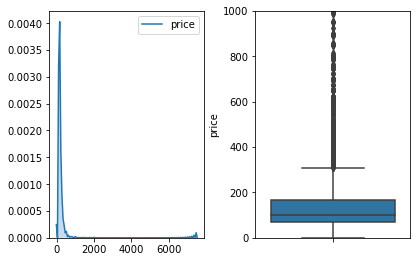

In [13]:
# Subplots consisting of the Density Plot and Box Plot of dependent variable 'price' column
fig, axs = plt.subplots(1,2)
fig.tight_layout(pad=2.0)

# Density Plot for frequency distribution of continuous numeric column 'price'
sns.kdeplot(airbnb_df['price'], shade=True, ax=axs[0])

# Box Plot to detect potential outliers in our 'price' column
sns.boxplot(y=airbnb_df['price'], ax=axs[1])
plt.ylim(0,1000)
plt.show()

### We see from the summary statistics, that the 'price' column has a minimum value of 0 which is actually free and some have price less than 10. So let's set a minimum for 'price' column for our price optimization model. Let's say the minimum value of 'price' column should be 10.

### As for maximum value of 'price' column > We will set maximum value of 'price' column as 700 and drop rest of the observations. Note: We are losing very less data which is fine.

In [14]:
x=700
print("If we consider our 'price' column to have maximum value as {0}, we lose {1}% of data.".format(x,airbnb_df[airbnb_df['price']>x].shape[0]/airbnb_df.shape[0]*100))

If we consider our 'price' column to have maximum value as 700, we lose 0.678765705483079% of data.


In [15]:
# Dropping observations from data if 'price' column has values less than 10 and greater than 800 thus setting minimum and maximum limit
airbnb_df.drop(airbnb_df[airbnb_df['price'] < 10].index, inplace = True) # Setting minimum value of 'price' column to 10.
airbnb_df.drop(airbnb_df[airbnb_df['price'] > 700].index, inplace = True) # Setting maximum value of 'price' column to 700.

### After setting minimum and maximum limit in 'price' column, we see that there are more outliers due to 'property_type' column. Let's explore 'property_type' column and try to detect the outliers and handle them accordingly.

In [16]:
# Outlier Detection in 'property_type' column
print(airbnb_df.groupby(['property_type']).mean()['price'])
print(airbnb_df['property_type'].value_counts())

property_type
Aparthotel            199.000000
Apartment             130.536778
Barn                  120.000000
Bed and breakfast      91.840000
Boat                  149.285714
Boutique hotel        176.630435
Bungalow              127.545455
Cabin                  88.000000
Camper/RV              85.800000
Castle                 65.000000
Condominium           175.095161
Cottage               184.571429
Earth house            77.666667
Guest suite           113.718861
Guesthouse             98.621622
Hostel                 59.918919
Hotel                 191.492063
House                 100.009735
Houseboat             260.000000
Loft                  177.181951
Other                 112.000000
Resort                292.000000
Serviced apartment    227.560000
Tiny house            109.733333
Townhouse             129.591942
Villa                  75.117647
Name: price, dtype: float64
Apartment             15444
House                  2260
Townhouse               968
Loft            

### We see above that 'Resort' has ridiculously high mean price which is obvious considering the property type. However these are outliers as they are quite distinct from the rest of our data. So we may remove such property type from our price optimization model. Note: We are removing just few observations, so it won't create much problem.

In [17]:
# Removing observations where 'property_type' column is Resort or Houseboat
airbnb_df.drop(airbnb_df[airbnb_df['property_type'] == 'Resort'].index, inplace = True) 
airbnb_df['property_type'].unique()

array(['Apartment', 'Guest suite', 'Townhouse', 'Bed and breakfast',
       'Loft', 'Condominium', 'House', 'Boutique hotel', 'Tiny house',
       'Guesthouse', 'Other', 'Boat', 'Serviced apartment', 'Earth house',
       'Bungalow', 'Hostel', 'Cottage', 'Villa', 'Hotel', 'Houseboat',
       'Castle', 'Aparthotel', 'Camper/RV', 'Cabin', 'Barn'], dtype=object)

### Now let's see for outliers in 'price' due to 'accommodates' column.

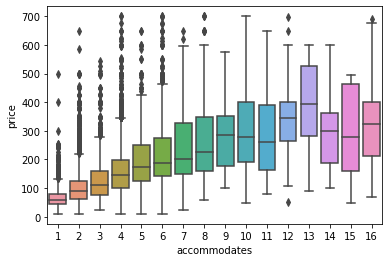

In [18]:
sns.boxplot(x=airbnb_df['accommodates'],y=airbnb_df['price'])

### Even though, we see outliers here, let's not remove more data.

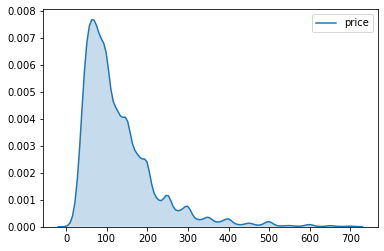

In [19]:
# Density plot for frequency distribution of continuous numeric column 'price' - After setting the minimum and maximum limit for 'price' column and handling outliers due to 'property_type' column
sns.kdeplot(airbnb_df['price'], shade=True)
plt.show()

### The above plot is the density plot of 'price' column after setting the minimum and maximum limit for 'price' column and handling outliers in 'price' column due to 'property_type' column. We see that the 'price' column follows a right skewed distribution which seems obvious.

### After handling outliers in 'price' column due to 'property_type' column, we see that there is an outlier in the 'bedrooms' column as well.

In [20]:
print(airbnb_df['bedrooms'].value_counts())
airbnb_df.drop(airbnb_df[airbnb_df['bedrooms'] > 10].index, inplace = True) # Setting maximum value of 'bedrooms' column to 10.

1.0     14868
2.0      2881
0.0      1629
3.0       962
4.0       199
5.0        48
6.0        15
7.0         3
21.0        1
10.0        1
9.0         1
8.0         1
Name: bedrooms, dtype: int64


In [21]:
# Summary statistics of all numeric columns (int64, float64) - count, mean, standard deviation, min, max, 25th percentile, 50th percentile and 75th percentile
print('After outlier detection and treatment stage, we are left with {0} observations which is good enough number of samples for training and validation.'.format(airbnb_df.shape[0]))
airbnb_df.describe()

After outlier detection and treatment stage, we are left with 20620 observations which is good enough number of samples for training and validation.


,host_is_superhost,host_total_listings_count,host_identity_verified,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,guests_included,number_of_reviews,number_of_reviews_ltm,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,TV,Wifi,Air_conditioning,Heating,Pool,Washer,Dryer,Kitchen,Free_street_parking,Gym,Smoke_detector,Carbon_monoxide_detector,days_host
count,20620.000000,20376.000000,20620.000000,20620.000000,20620.000000,20620.000000,20596.000000,20608.000000,20616.000000,20620.000000,20620.000000,20620.000000,20620.000000,20620.000000,20616.000000,20616.000000,20616.000000,20616.000000,20616.000000,20616.000000,20620.000000,20620.000000,20620.000000,20620.000000,20620.000000,20620.000000,20620.000000,20620.000000,20620.000000,20620.000000,20620.000000,20620.000000,20620.000000,20620.000000,20620.000000,20620.000000,20620.000000,20620.000000,20376.000000
mean,0.374297,3.654594,0.495732,40.726739,-73.945990,3.030165,1.125510,1.198078,1.633003,130.021678,1.734578,57.156693,21.018477,94.357759,9.701591,9.389503,9.820722,9.821740,9.604967,9.455811,0.404171,3.280407,1.895150,1.189961,0.105189,2.203900,0.699079,0.988846,0.899370,0.972502,0.005141,0.342144,0.337488,0.894811,0.551697,0.053201,0.910184,0.781571,1707.076217
std,0.483953,18.093078,0.499994,0.057193,0.052225,1.918501,0.373923,0.723455,1.162293,90.303857,1.282161,60.804882,20.144321,4.748997,0.515027,0.717553,0.411771,0.419619,0.544719,0.589493,0.490743,17.173598,17.000891,2.481347,0.849818,1.882535,0.458670,0.105025,0.300846,0.163532,0.071515,0.474439,0.472864,0.306804,0.497332,0.224439,0.285924,0.413190,895.869540
min,0.000000,0.000000,0.000000,40.506410,-74.239860,1.000000,0.000000,0.000000,0.000000,10.000000,1.000000,10.000000,0.000000,54.000000,6.000000,5.000000,6.000000,6.000000,6.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000
25%,0.000000,1.000000,0.000000,40.686040,-73.981370,2.000000,1.000000,1.000000,1.000000,69.000000,1.000000,18.000000,6.000000,92.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.750000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1004.000000
50%,0.000000,1.000000,0.000000,40.719985,-73.952040,2.000000,1.000000,1.000000,1.000000,100.000000,1.000000,34.000000,16.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.730000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1691.000000
75%,1.000000,3.000000,1.000000,40.762982,-73.928178,4.000000,1.000000,1.000000,2.000000,162.000000,2.000000,73.000000,31.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,2.000000,1.000000,1.000000,0.000000,3.170000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2378.000000
max,1.000000,311.000000,1.000000,40.908280,-73.712990,16.000000,5.500000,10.000000,21.000000,700.000000,16.000000,675.000000,407.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,310.000000,310.000000,47.000000,24.000000,52.630000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4117.000000


## 2.5 Handling Missing Values

### > Determine whether the column values are MCAR (Missing Completely at Random), MAR (Missing at Random) or NMAR (Not Missing at Random).

In [22]:
# Percentage of missing values in columns/attributes
round(airbnb_df.isnull().sum()/airbnb_df.shape[0]*100,2)

listing_id                                       0.00
scrape_date                                      0.00
listing_name                                     0.00
host_id                                          0.00
host_name                                        1.18
host_since                                       1.18
host_response_time                              15.11
host_response_rate                              15.11
host_is_superhost                                0.00
host_total_listings_count                        1.18
host_verifications                               0.00
host_identity_verified                           0.00
neighbourhood                                    0.00
neighbourhood_group                              0.00
city                                             0.20
state                                            0.00
zipcode                                          0.92
country                                          0.00
latitude                    

In [23]:
#Imputing missing values of Continuous Numeric columns with either mean filling or median filling depending on the skewness
for col in ['days_host','host_total_listings_count','bathrooms','bedrooms','beds']:
    if -0.7<=airbnb_df[col].skew()<=0.7:
        col_mean = airbnb_df[col].mean()
        airbnb_df[col]=airbnb_df[col].fillna(round(col_mean))
        print("For {0} : Imputing missing values with mean which is {1}".format(col,round(col_mean)))
    else:
        col_median = airbnb_df[col].median()
        airbnb_df[col]=airbnb_df[col].fillna(round(col_median))
        print("For {0} : Imputing missing values with median which is {1}".format(col,col_median))

print('Done imputing missing values of Continuous Numeric columns.')

For days_host : Imputing missing values with mean which is 1707
For host_total_listings_count : Imputing missing values with median which is 1.0
For bathrooms : Imputing missing values with median which is 1.0
For bedrooms : Imputing missing values with median which is 1.0
For beds : Imputing missing values with median which is 1.0
Done imputing missing values of Continuous Numeric columns.


In [24]:
# Number of missing values in columns
airbnb_df.isnull().sum()

listing_id                                         0
scrape_date                                        0
listing_name                                       1
host_id                                            0
host_name                                        244
host_since                                       244
host_response_time                              3115
host_response_rate                              3115
host_is_superhost                                  0
host_total_listings_count                          0
host_verifications                                 0
host_identity_verified                             0
neighbourhood                                      0
neighbourhood_group                                0
city                                              41
state                                              0
zipcode                                          189
country                                            0
latitude                                      

In [25]:
dict_local_competitors = airbnb_df.groupby('neighbourhood')['price'].count().to_dict()

In [26]:
airbnb_df['number_of_competitors'] = [dict_local_competitors[item]-1 for item in airbnb_df['neighbourhood']]
airbnb_df.head()

,listing_id,scrape_date,listing_name,host_id,host_name,host_since,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,host_verifications,host_identity_verified,neighbourhood,neighbourhood_group,city,state,zipcode,country,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,guests_included,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,TV,Wifi,Air_conditioning,Heating,Pool,Washer,Dryer,Kitchen,Free_street_parking,Gym,Smoke_detector,Carbon_monoxide_detector,days_host,number_of_competitors
0,2595,2019-12-07,Skylit Midtown Castle,2845,Jennifer,2008-09-09,within a day,85%,0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",1,Midtown,Manhattan,New York,NY,10018,United States,40.75362,-73.98377,Apartment,Entire home/apt,1,1.0,0.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",Kitchen,""Paid park...",225.0,1,48,7,2009-11-21,2019-11-04,94.0,9.0,9.0,10.0,10.0,10.0,9.0,0,strict_14_with_grace_period,1,1,0,0,0.39,1,1,1,1,0,0,0,1,1,0,1,1,4106.0,390
1,3831,2019-12-07,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,2008-12-07,within an hour,100%,0,1.0,"['email', 'phone', 'reviews', 'kba']",1,Clinton Hill,Brooklyn,Brooklyn,NY,11238,United States,40.68514,-73.95976,Guest suite,Entire home/apt,3,1.0,1.0,4.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",89.0,1,295,75,2014-09-30,2019-11-22,90.0,9.0,9.0,10.0,9.0,10.0,9.0,0,moderate,1,1,0,0,4.67,1,1,1,1,0,0,0,1,1,0,1,1,4017.0,231
2,5099,2019-12-06,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,2009-02-02,NaN,NaN,0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",0,Murray Hill,Manhattan,New York,NY,10016,United States,40.74767,-73.97500,Apartment,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",200.0,2,78,8,2009-04-20,2019-10-13,90.0,10.0,9.0,10.0,10.0,10.0,9.0,0,moderate,1,1,0,0,0.60,1,1,1,1,0,0,0,1,0,0,1,1,3959.0,107
3,5121,2019-12-06,BlissArtsSpace!,7356,Garon,2009-02-03,within a few hours,100%,0,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",0,Bedford-Stuyvesant,Brooklyn,Brooklyn,NY,11216,United States,40.68688,-73.95596,Apartment,Private room,2,1.0,1.0,1.0,Futon,"{Wifi,""Air conditioning"",Kitchen,""Pets live on...",60.0,1,49,0,2009-05-28,2017-10-05,90.0,8.0,8.0,10.0,10.0,9.0,9.0,0,strict_14_with_grace_period,1,0,1,0,0.38,0,1,1,1,0,0,0,1,0,0,0,0,3958.0,1862
4,5178,2019-12-05,Large Furnished Room Near B'way,8967,Shunichi,2009-03-03,within a few hours,100%,0,1.0,"['email', 'phone', 'facebook', 'reviews']",0,Hell's Kitchen,Manhattan,New York,NY,10019,United States,40.76489,-73.98493,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Wifi,""Air conditioning"",""Paid parking off ...",79.0,1,454,47,2009-05-06,2019-11-21,84.0,9.0,7.0,9.0,9.0,10.0,8.0,0,strict_14_with_grace_period,1,0,1,0,3.52,1,1,1,1,0,0,0,0,1,0,1,0,3929.0,844


### Note: We can still see some columns/attributes have missing values. Currently I haven't considered those columns/attributes as possible features in my model for certain reasons.

## 2.6 Exploratory Data Analysis (Correlation Analysis, Visualizations and Statistical Analysis)

### > Correlation Analysis helps us with initial feature selection and handling multicollinearity.

In [27]:
# This temporary dataframe includes all our possible independent variables and dependent variable
airbnb_df_temp = airbnb_df.drop(['listing_id','scrape_date','listing_name','host_id','host_name','host_since','host_response_time','host_response_rate','host_verifications','neighbourhood_group','city','state','country','zipcode','latitude','longitude','amenities','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','calculated_host_listings_count','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms'],axis=1)
airbnb_df_temp.columns

Index(['host_is_superhost', 'host_total_listings_count',
       'host_identity_verified', 'neighbourhood', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'price',
       'guests_included', 'number_of_reviews', 'number_of_reviews_ltm',
       'first_review', 'last_review', 'instant_bookable',
       'cancellation_policy', 'reviews_per_month', 'TV', 'Wifi',
       'Air_conditioning', 'Heating', 'Pool', 'Washer', 'Dryer', 'Kitchen',
       'Free_street_parking', 'Gym', 'Smoke_detector',
       'Carbon_monoxide_detector', 'days_host', 'number_of_competitors'],
      dtype='object')

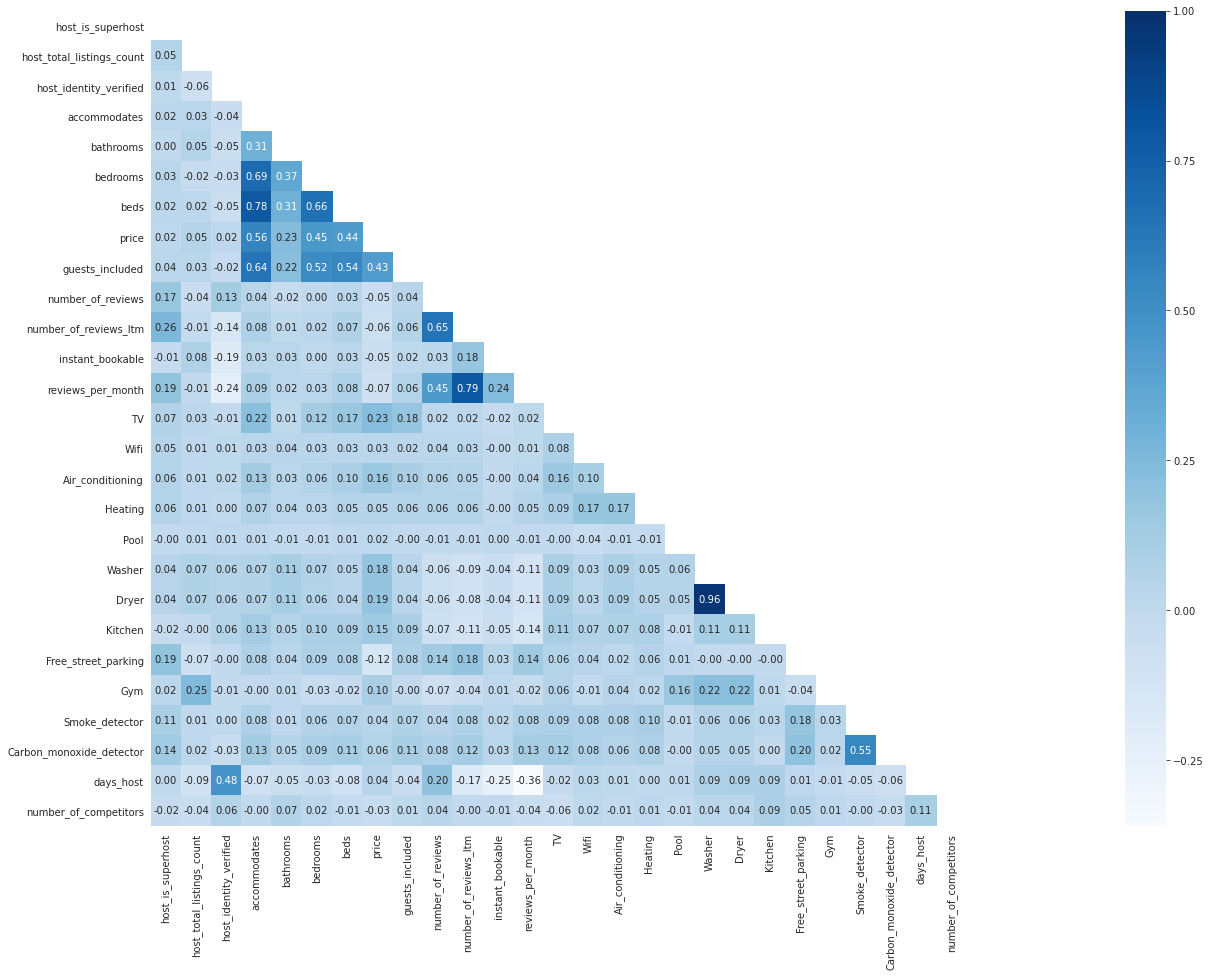

In [28]:
# Heatmap using seaborn indicating pairwise Pearson correlations of numeric variables
corr = airbnb_df_temp.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(57, 15))
    ax = sns.heatmap(corr, mask=mask, square=True, cmap="Blues", annot=True, fmt=".2f")

### Heatmap Interpretation:

### 1. Some of the independent variables do not have any correlation with our dependent variable 'price' and hence we shall not consider those variables in our model. E.g. days_host, host_identity_verified, etc.

### 2. We see that 'accommodates' has a strong positive correlation (0.56) with 'price' and hence we will include it in our model along with other independent variables namely 'bathrooms', 'bedrooms' and  'beds' because they have good enough correlation with 'price' as well.

### 3. And in the case of amenities : We will include 'TV', 'Air_conditioning', 'Dryer' (which basically is a Washer-Dryer unit) and 'Gym' in our model as independent variables because of it's moderate correlation with 'price'.

### Note: Heatmap only involves numeric variables and not text variables. So in the case of text variables - we will include only 'neighbourhood' and 'room_type' in our model as independent variables because prices vary with neighbourhood and the type of the room.

### Predictive Power Score (PPS)

### What PPS is doing here is, it is seeing how the predictive performance of our Decision Tree Regressor model with one independent variable and dependent variable is as compared to the baseline model or null model (model which will always predict the median value). 

### Predictive Power Score can be used along with the Heatmap to do the initial feature selection for our model. Since Heatmap doesn't involve text variables, this is where Predictive Power Score can be effective.

In [29]:
import ppscore as pps
pps.score(airbnb_df_temp, "neighbourhood", "price")

{'x': 'neighbourhood',
 'y': 'price',
 'task': 'regression',
 'ppscore': 0.09067010390372021,
 'metric': 'mean absolute error',
 'baseline_score': 58.6292,
 'model_score': 53.31328434420801,
 'model': DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=None, splitter='best')}

In [30]:
# List of top 50 Neighbourhoods with high number of listings
neighbourhood_top50 = airbnb_df_temp['neighbourhood'].value_counts().head(50).index.tolist()
neighbourhood_top50

['Bedford-Stuyvesant',
 'Williamsburg',
 'Harlem',
 'Bushwick',
 "Hell's Kitchen",
 'East Village',
 'Crown Heights',
 'Upper West Side',
 'Upper East Side',
 'East Harlem',
 'Astoria',
 'Chelsea',
 'Lower East Side',
 'Midtown',
 'Washington Heights',
 'Greenpoint',
 'Flushing',
 'West Village',
 'Flatbush',
 'East Flatbush',
 'Prospect-Lefferts Gardens',
 'Clinton Hill',
 'Long Island City',
 'Park Slope',
 'Chinatown',
 'Sunset Park',
 'Fort Greene',
 'Financial District',
 'Prospect Heights',
 'East Elmhurst',
 'Jamaica',
 'Sunnyside',
 'East New York',
 'Ditmars Steinway',
 'Ridgewood',
 'Greenwich Village',
 'Gramercy',
 'Kips Bay',
 'SoHo',
 'South Slope',
 'Gowanus',
 'Elmhurst',
 'Jackson Heights',
 'Murray Hill',
 'Nolita',
 'Inwood',
 'Canarsie',
 'Carroll Gardens',
 'Woodside',
 'Morningside Heights']

In [31]:
medianprice_neighbourhood = airbnb_df_temp.groupby(['neighbourhood']).median()['price']
medianprice_neighbourhood

neighbourhood
Allerton                      69.0
Arden Heights                 75.0
Arrochar                      71.0
Arverne                      100.0
Astoria                       78.5
Bath Beach                    94.0
Battery Park City            149.5
Bay Ridge                     77.0
Bay Terrace                  184.0
Baychester                    85.0
Bayside                       59.5
Bayswater                     70.0
Bedford-Stuyvesant            89.0
Belle Harbor                 200.0
Bellerose                     60.0
Belmont                      102.5
Bensonhurst                   79.5
Bergen Beach                  90.0
Boerum Hill                  158.5
Borough Park                  54.0
Briarwood                     70.0
Brighton Beach                75.0
Bronxdale                     47.5
Brooklyn Heights             175.0
Brownsville                   65.0
Bull's Head                   32.0
Bushwick                      70.0
Cambria Heights               60.0
Canars

In [32]:
medianprice_neighbourhoodtop50 = medianprice_neighbourhood.reindex(neighbourhood_top50).sort_values(ascending=False)
medianprice_neighbourhoodtop50

neighbourhood
West Village                 200.0
Greenwich Village            199.0
Murray Hill                  199.0
Financial District           199.0
SoHo                         189.0
Midtown                      185.0
Nolita                       176.0
Chelsea                      175.0
Carroll Gardens              167.5
Gramercy                     159.5
Kips Bay                     155.0
East Village                 150.0
Hell's Kitchen               150.0
Park Slope                   150.0
Lower East Side              149.0
Upper West Side              145.0
South Slope                  143.5
Upper East Side              140.0
Fort Greene                  140.0
Gowanus                      139.0
Clinton Hill                 130.0
Chinatown                    129.0
Greenpoint                   128.5
Prospect Heights             123.0
Williamsburg                 120.0
East Harlem                  100.0
Crown Heights                 99.0
Harlem                        95.0
Long I

### Above are the top 50 neighbourhoods with high number of Airbnb listings, which are sorted by median price in descending order. We can see that West Village has high median pricing of 200 USD whereas Flushing, East Elmhurst and Elmhurst have lowest median pricing of 60 USD among these top 50 neighbourhoods.

In [33]:
import ppscore as pps
pps.score(airbnb_df_temp, "room_type", "price")

{'x': 'room_type',
 'y': 'price',
 'task': 'regression',
 'ppscore': 0.20398873666192308,
 'metric': 'mean absolute error',
 'baseline_score': 58.6292,
 'model_score': 46.66950356050078,
 'model': DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=None, splitter='best')}

### From PPS, we see that having 'neighbourhood' or 'room_type' alone as independent variable in our model performs better than the null model or baseline model. So definitely, both these variables should be included as independent variables or predictors in our model.

## 2.7 Handling Categorical Variables for ML Modeling (Text Encoding)

### We need to deal with 'neighbourhood' and 'room_type' and perform text encoding since most ML models deal with numeric data.

In [34]:
# The resulting dataframe includes the independent variables and the dependent variable for our predictive model.
airbnb_df_model = airbnb_df_temp[['neighbourhood','room_type','accommodates','bathrooms','bedrooms','beds','TV','Air_conditioning','Dryer','Gym','price']]
airbnb_df_model.head(10)

,neighbourhood,room_type,accommodates,bathrooms,bedrooms,beds,TV,Air_conditioning,Dryer,Gym,price
0,Midtown,Entire home/apt,1,1.0,0.0,1.0,1,1,0,0,225.0
1,Clinton Hill,Entire home/apt,3,1.0,1.0,4.0,1,1,0,0,89.0
2,Murray Hill,Entire home/apt,2,1.0,1.0,1.0,1,1,0,0,200.0
3,Bedford-Stuyvesant,Private room,2,1.0,1.0,1.0,0,1,0,0,60.0
4,Hell's Kitchen,Private room,2,1.0,1.0,1.0,1,1,0,0,79.0
5,Upper West Side,Private room,1,1.0,1.0,1.0,0,1,0,0,79.0
6,Chinatown,Entire home/apt,3,1.0,1.0,2.0,1,1,0,0,150.0
7,Hell's Kitchen,Private room,2,1.0,1.0,1.0,0,1,0,0,85.0
8,South Slope,Private room,2,1.5,1.0,0.0,0,1,1,0,89.0
9,West Village,Entire home/apt,1,1.0,1.0,1.0,0,1,0,0,120.0


### Independent Variables/Explanatory Variables/Predictors : neighbourhood, room_type, accommodates, bathrooms, bedrooms, beds, TV, Air_conditioning, Dryer, Gym

### Dependent Variable/Response Variable/Target Variable: price

### Let's handle the nominal text variable 'neighbourhood' first

In [35]:
print("There are a total of {0} unique values in the 'neighbourhood' column.".format(airbnb_df_model['neighbourhood'].nunique()))
airbnb_df_model['neighbourhood'].value_counts()

There are a total of 213 unique values in the 'neighbourhood' column.


Bedford-Stuyvesant           1863
Williamsburg                 1494
Harlem                       1265
Bushwick                      963
Hell's Kitchen                845
East Village                  747
Crown Heights                 675
Upper West Side               628
Upper East Side               607
East Harlem                   566
Astoria                       400
Chelsea                       397
Lower East Side               394
Midtown                       391
Washington Heights            381
Greenpoint                    354
Flushing                      290
West Village                  279
Flatbush                      263
East Flatbush                 254
Prospect-Lefferts Gardens     254
Clinton Hill                  232
Long Island City              231
Park Slope                    223
Chinatown                     194
Sunset Park                   193
Fort Greene                   192
Financial District            170
Prospect Heights              168
East Elmhurst 

### We see that our independent text variable 'neighbourhood' has 213 unique categories and so doing a complete one hot encoding here won't be the right approach since it will lead to 212 dummy variables which will lead to high dimensionality and thus will lead to memory issues and complexities. So we need to use another approach here. Hence, initially let's go with - Partial One Hot Encoding which reduces the dimensionality avoiding memory issues, however there might be some information loss since multiple less frequent categories will be grouped as 'Other'.

In [36]:
neighbourhood_top50 = airbnb_df_model['neighbourhood'].value_counts().head(50).index.tolist()
neighbourhood_top50

['Bedford-Stuyvesant',
 'Williamsburg',
 'Harlem',
 'Bushwick',
 "Hell's Kitchen",
 'East Village',
 'Crown Heights',
 'Upper West Side',
 'Upper East Side',
 'East Harlem',
 'Astoria',
 'Chelsea',
 'Lower East Side',
 'Midtown',
 'Washington Heights',
 'Greenpoint',
 'Flushing',
 'West Village',
 'Flatbush',
 'East Flatbush',
 'Prospect-Lefferts Gardens',
 'Clinton Hill',
 'Long Island City',
 'Park Slope',
 'Chinatown',
 'Sunset Park',
 'Fort Greene',
 'Financial District',
 'Prospect Heights',
 'East Elmhurst',
 'Jamaica',
 'Sunnyside',
 'East New York',
 'Ditmars Steinway',
 'Ridgewood',
 'Greenwich Village',
 'Gramercy',
 'Kips Bay',
 'SoHo',
 'South Slope',
 'Gowanus',
 'Elmhurst',
 'Jackson Heights',
 'Murray Hill',
 'Nolita',
 'Inwood',
 'Canarsie',
 'Carroll Gardens',
 'Woodside',
 'Morningside Heights']

In [37]:
airbnb_df_model['neighbourhood'] = [item if item in neighbourhood_top50 else 'Other' for item in airbnb_df_model['neighbourhood']]
airbnb_df_model['neighbourhood'].value_counts()/airbnb_df_model.shape[0]*100

Other                        14.985451
Bedford-Stuyvesant            9.034918
Williamsburg                  7.245393
Harlem                        6.134821
Bushwick                      4.670223
Hell's Kitchen                4.097963
East Village                  3.622696
Crown Heights                 3.273521
Upper West Side               3.045587
Upper East Side               2.943744
East Harlem                   2.744908
Astoria                       1.939864
Chelsea                       1.925315
Lower East Side               1.910766
Midtown                       1.896217
Washington Heights            1.847721
Greenpoint                    1.716780
Flushing                      1.406402
West Village                  1.353055
Flatbush                      1.275461
East Flatbush                 1.231814
Prospect-Lefferts Gardens     1.231814
Clinton Hill                  1.125121
Long Island City              1.120272
Park Slope                    1.081474
Chinatown                

In [38]:
print("There are a total of {0} unique values in the 'room_type' column.".format(airbnb_df_model['room_type'].nunique()))
airbnb_df_model['room_type'].value_counts()

There are a total of 4 unique values in the 'room_type' column.


Entire home/apt    10748
Private room        9324
Shared room          421
Hotel room           127
Name: room_type, dtype: int64

In [39]:
#OneHotEncoding Categorical Variables using get_dummies for ML modeling
airbnb_df_model = pd.get_dummies(airbnb_df_model, prefix_sep='_', drop_first=True)
print(airbnb_df_model.shape)
airbnb_df_model.head()

(20620, 62)


,accommodates,bathrooms,bedrooms,beds,TV,Air_conditioning,Dryer,Gym,price,neighbourhood_Bedford-Stuyvesant,neighbourhood_Bushwick,neighbourhood_Canarsie,neighbourhood_Carroll Gardens,neighbourhood_Chelsea,neighbourhood_Chinatown,neighbourhood_Clinton Hill,neighbourhood_Crown Heights,neighbourhood_Ditmars Steinway,neighbourhood_East Elmhurst,neighbourhood_East Flatbush,neighbourhood_East Harlem,neighbourhood_East New York,neighbourhood_East Village,neighbourhood_Elmhurst,neighbourhood_Financial District,neighbourhood_Flatbush,neighbourhood_Flushing,neighbourhood_Fort Greene,neighbourhood_Gowanus,neighbourhood_Gramercy,neighbourhood_Greenpoint,neighbourhood_Greenwich Village,neighbourhood_Harlem,neighbourhood_Hell's Kitchen,neighbourhood_Inwood,neighbourhood_Jackson Heights,neighbourhood_Jamaica,neighbourhood_Kips Bay,neighbourhood_Long Island City,neighbourhood_Lower East Side,neighbourhood_Midtown,neighbourhood_Morningside Heights,neighbourhood_Murray Hill,neighbourhood_Nolita,neighbourhood_Other,neighbourhood_Park Slope,neighbourhood_Prospect Heights,neighbourhood_Prospect-Lefferts Gardens,neighbourhood_Ridgewood,neighbourhood_SoHo,neighbourhood_South Slope,neighbourhood_Sunnyside,neighbourhood_Sunset Park,neighbourhood_Upper East Side,neighbourhood_Upper West Side,neighbourhood_Washington Heights,neighbourhood_West Village,neighbourhood_Williamsburg,neighbourhood_Woodside,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,1,1.0,0.0,1.0,1,1,0,0,225.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3,1.0,1.0,4.0,1,1,0,0,89.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,1.0,1.0,1.0,1,1,0,0,200.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2,1.0,1.0,1.0,0,1,0,0,60.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2,1.0,1.0,1.0,1,1,0,0,79.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


## 2.8 Train and Test Split and Data Scaling

In [40]:
# Independent variables/Explanatory variables/Predictors
X = airbnb_df_model.drop(['price'],axis=1) 

# Dependent variable/Response variable/Target variable
y = airbnb_df_model['price']

#Scaling is very important as it brings all the features on a similar scale and helps algorithms perform better or converge faster
from sklearn.preprocessing import StandardScaler
print('We will be using StandardScaler because we want our outliers to have reduced influence due to normalization.')

from sklearn.model_selection import train_test_split

X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.3)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

X_train

We will be using StandardScaler because we want our outliers to have reduced influence due to normalization.


array([[-1.05751812, -0.33466573, -0.2771709 , ..., -0.07558763,
         1.10868805, -0.14141636],
       [-0.53846832, -0.33466573, -0.2771709 , ..., -0.07558763,
         1.10868805, -0.14141636],
       [-1.05751812, -0.33466573, -0.2771709 , ..., -0.07558763,
        -0.90196697,  7.07131767],
       ...,
       [ 0.49963128, -0.33466573,  1.09716257, ..., -0.07558763,
        -0.90196697, -0.14141636],
       [ 0.49963128, -0.33466573, -0.2771709 , ..., -0.07558763,
        -0.90196697, -0.14141636],
       [-0.01941852, -0.33466573, -1.65150437, ..., -0.07558763,
        -0.90196697, -0.14141636]])

## 3. Modeling

## 3.1 Regression Analysis - Linear Regression or Multiple Linear Regression (OLS method)

### When we are dealing with Linear Regression/Multiple Linear Regression (OLS method - Ordinary Least Squares), it is important to know the following:
### > How does Linear Regression/Multiple Linear Regression (OLS) work? (mathematical concept behind it)
### > How do you interpret OLS results and diagnostics? (statsmodels)
### > How do you make predictions with Linear Regression/Multiple Linear Regression (OLS)? (sklearn)
### > Check assumptions for OLS - Linearity, Homoscedasticity, No autocorrelation, No spatial autocorrelation, Normality, Independence and No multicollinearity (Very important to check assumptions and handle it if assumption violated)

In [41]:
# Learning the train data using Linear Regression (OLS) to find the best fit line or predicted line that minimizes the sum of squared errors
from sklearn import linear_model

# Instance of trained model using Linear Regression before checking for assumptions of OLS
linear_reg = linear_model.LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Residual Analysis/Residual Plot - Before checking assumptions for OLS

Residual Plot - Before log transform of dependent variable


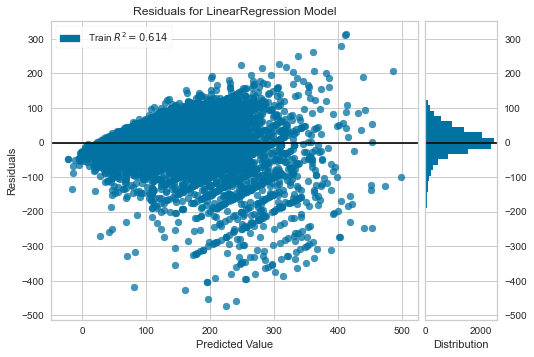

In [42]:
print('Residual Plot - Before log transform of dependent variable')
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(linear_reg)
visualizer.fit(X_train,y_train)
visualizer.show()

### From the above residual plot, we can notice :

### 1. Presence of heteroscedasticity - Here variance in error terms is not constant or increasing across observations. Hence, the OLS assumption of homoscedasticity gets violated. We need to find a solution for this problem. We could either do a logarithmic or square root transformation of the dependent variable to shrink larger responses and hence treat the heteroscedasticity problem.

### Hence, below we are doing a log transformation of the dependent variable to treat heteroscedasticity problem.

In [43]:
# Instance of trained model using Linear Regression after checking for assumptions of OLS and treating heteroscedasticity problem by doing log transformation of dependent variable
linear_reg_ols = linear_model.LinearRegression()
linear_reg_ols.fit(X_train, np.log(y_train))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Residual Analysis/Residual Plot - After checking assumptions for OLS and treating heteroscedasticity problem by doing log transformation of dependent variable

Residual Plot after log transform of dependent variable


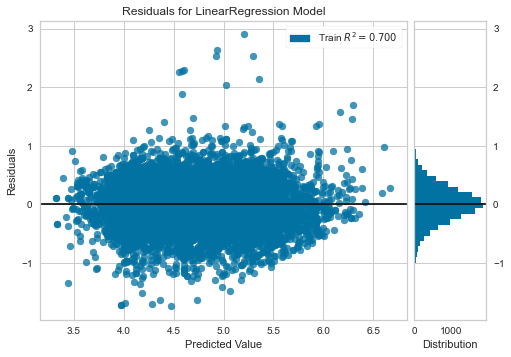

In [44]:
print('Residual Plot after log transform of dependent variable')
visualizer_ols = ResidualsPlot(linear_reg_ols)
visualizer_ols.fit(X_train,np.log(y_train))
visualizer_ols.show()

### Assumptions of OLS has been checked - Linearity (we did not see any non linear pattern in residual plots), Homoscedasticity (Heteroscedasticity detected even after log transform which we will tackle before OLS interpretation), No autocorrelation (Residual Plot and Durbin Watson statistic doesn't indicate any autocorrelation), Normality (Error terms are normally distributed), Independence (checked) and No multicollinearity (checked)

### Now for Heteroscedasticity even after log transformation, so let's handle this by using OLS with 'robust' standard errors or 'heteroscedasticity' corrected standard errors (Robust Regression to tackle Heteroscedasticity problem during interpretation of OLS results)

### Interpreting OLS results and Diagnostics:

### Robust Regression (OLS - Ordinary Least Squares with 'Robust' Standard Errors or Heteroscedastic corrected Standard Errors) to treat Heteroscedasticity Problem for Correct Interpretation of OLS results.

In [45]:
# Fitting training data to get OLS results and diagnostics with robust standard errors due to heteroscedasticity problem
# cov_type='HC1' for robust standard errors or heteroscedasticity corrected errors (Robust Regression)

import statsmodels.api as sm
X1 = sm.add_constant(X_train_org)
results = sm.OLS(np.log(y_train), X1).fit(cov_type='HC1')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     561.5
Date:                Tue, 04 Aug 2020   Prob (F-statistic):               0.00
Time:                        02:33:51   Log-Likelihood:                -4694.7
No. Observations:               14434   AIC:                             9513.
Df Residuals:                   14372   BIC:                             9983.
Df Model:                          61                                         
Covariance Type:                  HC1                                         
                                              coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [46]:
# Statistical test - White Test and Breusch Pagan Test to detect heteroscedasticity

from statsmodels.stats import diagnostic as diag
# Run the White's test
_, pval, __, f_pval = diag.het_white(results.resid, results.model.exog, retres = False)
print(pval, f_pval)
print('-'*100)

# print the results of the test
if pval > 0.05:
    print("For the White's Test")
    print("The p-value was {:.4}".format(pval))
    print("We fail to reject the null hyptothesis, so there is no heteroscedasticity. \n")
    
else:
    print("For the White's Test")
    print("The p-value was {:.4}".format(pval))
    print("We reject the null hypothesis, so there is heteroscedasticity. \n")

# Run the Breusch-Pagan test
_, pval, __, f_pval = diag.het_breuschpagan(results.resid, results.model.exog)
print(pval, f_pval)
print('-'*100)

# print the results of the test
if pval > 0.05:
    print("For the Breusch-Pagan's Test")
    print("The p-value was {:.4}".format(pval))
    print("We fail to reject the null hypothesis, so there is no heteroscedasticity.")

else:
    print("For the Breusch-Pagan's Test")
    print("The p-value was {:.4}".format(pval))
    print("We reject the null hypothesis, so there is heteroscedasticity.")

8.05540787513219e-57 3.444896982053947e-61
----------------------------------------------------------------------------------------------------
For the White's Test
The p-value was 8.055e-57
We reject the null hypothesis, so there is heteroscedasticity. 

3.37886170172634e-56 3.226657509516013e-57
----------------------------------------------------------------------------------------------------
For the Breusch-Pagan's Test
The p-value was 3.379e-56
We reject the null hypothesis, so there is heteroscedasticity.


### Predictions with Linear Regression (OLS):

### Note: Linear Regression Equation here looks like > log(y) = b0 + b1*X1 +.......+ bn*Xn 

In [47]:
print("Train Score (R^2): {0}".format(linear_reg_ols.score(X_train, np.log(y_train))))
print("Test Score (R^2): {0}".format(linear_reg_ols.score(X_test, np.log(y_test))))

Train Score (R^2): 0.6998641565387029
Test Score (R^2): 0.7072147877459181


In [48]:
from sklearn.metrics import mean_squared_error

print('Linear Regression')

# Train score
linear_reg_score_train = round(linear_reg_ols.score(X_train, np.log(y_train)),2)
print("\nTrain score: ",linear_reg_score_train)

# Test score
linear_reg_score_test = round(linear_reg_ols.score(X_test, np.log(y_test)),2)
print("Test score: ",linear_reg_score_test)

# Predictions with OLS - RMSE (Root Mean Squared Error) as a metric
pred = linear_reg_ols.predict(X_test)
rmse_lreg = np.sqrt(mean_squared_error(np.exp(pred), y_test))
print("Test RMSE LREG: ",rmse_lreg)

Linear Regression

Train score:  0.7
Test score:  0.71
Test RMSE LREG:  52.636918891803695


### From above, we see that in both train and test, almost 71% of variations in the log(price) can be explained by the set of independent variables we chose in our model and we get a Linear Regression test RMSE of 52.63, which seems to be quite good as well considering the amount of features we have.

In [49]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': np.exp(pred)})
df

,Actual,Predicted
82,85.0,85.769624
13013,220.0,154.946202
44928,102.0,64.701112
3452,89.0,93.880461
9002,80.0,91.955222
...,...,...
37265,53.0,81.336592
37734,369.0,302.006932
12816,77.0,61.507730
37540,150.0,117.764705


### Now that we used Linear Regression/Multiple Linear Regression (OLS method) to make predictions on Airbnb listings price and simultaneously maintain interpretability, we will look at other ML algorithms for regression analysis.

## 3.2 Regularized Regression (Ridge, Lasso, ElasticNet)

### When we are dealing with Regularized Regression (Ridge, Lasso, ElasticNet), it is important to know the following:
### > Why do we use Regularized Regression (Ridge, Lasso, ElasticNet)?
### > How does Regularized Regression (Ridge, Lasso, ElasticNet) work?
### > How do you make predictions with Regularized Regression (Ridge, Lasso, ElasticNet) ? (sklearn and GridSearchCV for hyperparameter tuning)

In [50]:
from sklearn.model_selection import GridSearchCV,cross_val_score

In [51]:
# Ridge Regression is a regularized regression which helps in eliminating overfitting problems in linear regression.
# It does so by shrinking the coefficient estimates towards zero as we increase the value of 'alpha' from 0 to infinity, which is our hyperparameter in this case.
# However, Ridge Regression doesn't shrink the coefficient estimates to zero which causes Ridge to not perform feature selection.

# Hyperparameter tuning (Finding optimal value of alpha)
ridge_params = {'alpha':np.array([0.005, 0.01, 0.02, 0.03, 0.05, 0.06, 0.5, 1, 5, 10, 15])}
grid_search_ridge = GridSearchCV(linear_model.Ridge(random_state=0), ridge_params, cv=10, n_jobs=-1)
grid_search_ridge.fit(X_train, np.log(y_train))

print("\nBest tuning parameter obtained from grid search: " ,grid_search_ridge.best_params_)


Best tuning parameter obtained from grid search:  {'alpha': 15.0}


In [52]:
print('Ridge Regression')

ridge = linear_model.Ridge(grid_search_ridge.best_params_['alpha'])
ridge.fit(X_train,np.log(y_train))

ridge_score_train = round(ridge.score(X_train,np.log(y_train)),2)
print("\nTrain score: ",round(ridge.score(X_train,np.log(y_train)),2)) 

ridge_score_test = round(ridge.score(X_test,np.log(y_test)),2)
print("Test score: ",round(ridge.score(X_test,np.log(y_test)),2))
pred_test = ridge.predict(X_test)

rmse_ridge = np.sqrt(mean_squared_error(np.exp(pred_test), y_test))
print("Test RMSE RIDGE: ",rmse_ridge)

Ridge Regression

Train score:  0.7
Test score:  0.71
Test RMSE RIDGE:  52.64427389761456


In [53]:
#Cross validation for mean score k = 10
for alpha in [0.005, 0.02, 0.03, 0.05, 0.06, 0.5, 1, 5, 10, 15]:
    train_scores = []
    test_scores = []
    train_scores.append(cross_val_score(linear_model.Ridge(alpha),X_train,np.log(y_train),cv=10))
    test_scores.append(cross_val_score(linear_model.Ridge(alpha),X_test,np.log(y_test),cv=10))

print("\nMean Train score:",np.mean(train_scores))
print("Mean Test score: ",np.mean(test_scores))


Mean Train score: 0.6967875310659284
Mean Test score:  0.7071559147371611


Text(0.5, 0, 'Alpha')

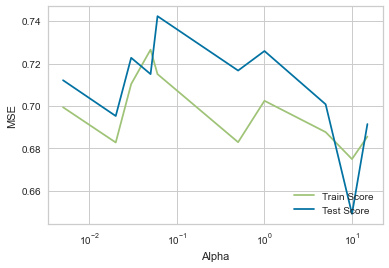

In [54]:
%matplotlib inline
train_score_array = []
test_score_array = []

x_axis = np.array([0.005, 0.02, 0.03, 0.05, 0.06, 0.5, 1, 5, 10, 15])
plt.plot(x_axis, np.array(train_scores).reshape(-1,1), c = 'g', label = 'Train Score')
plt.plot(x_axis, np.array(test_scores).reshape(-1,1), c = 'b', label = 'Test Score')
plt.legend()
plt.ylabel('MSE')
plt.xscale('log')
plt.legend(loc = 4)
plt.xlabel("Alpha")

### Spatial Visualizations and Analysis with Folium:

In [55]:
import folium

def generateBaseMap(default_location=[40.693943, -73.985880], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

base_map = generateBaseMap()

In [56]:
from folium.plugins import HeatMap
df_copy = airbnb_df.copy()
base_map = generateBaseMap()
HeatMap(data=df_copy[['latitude', 'longitude', 'price']].groupby(['latitude', 'longitude']).median().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map)

In [57]:
base_map

In [58]:
airbnb_df['price_rate'] = airbnb_df['price']/airbnb_df['accommodates']

# 3.3 k-nn Regressor

In [59]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV,cross_val_score

k_range = list(range(1,10))
weight_options = ["uniform", "distance"]

param_grid = dict(n_neighbors = k_range)

knn = KNeighborsRegressor()

gridknn = GridSearchCV(knn, param_grid, cv = 10)
gridknn.fit(X_train,y_train)
print (gridknn.best_params_)
print (gridknn.best_estimator_)

{'n_neighbors': 8}
KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=8, p=2,
                    weights='uniform')


In [60]:
knn_reg = KNeighborsRegressor(gridknn.best_params_['n_neighbors'])
knn_reg.fit(X_train, y_train)

knn_reg_train_score = round((knn_reg.score(X_train, y_train)),2)
print("\nTrain score: ",knn_reg_train_score)
knn_reg_test_score= round((knn_reg.score(X_test, y_test)),2)
print("Test score: ",knn_reg_test_score)


y_pred_test = knn_reg.predict(X_test)
rmse_knn = np.sqrt(mean_squared_error(y_pred_test, y_test))
print("RMSE kNN Regressor: ",rmse_knn)


Train score:  0.69
Test score:  0.63
RMSE kNN Regressor:  53.67515802314333
